# SENG 474 Lab 2: Network Intrusion Detection with Decision Trees

### Import required modules

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus as pydot

from intrusion_detection import *

%load_ext autoreload 
%autoreload 2

### Loading Data
Uses the parsing features from intrusion_detection.py (now written for Python 3)

* **`X`**: stores the feature vectors
* **`y`**: stores the ground truth data

In [2]:
parser = DataParser()
X = np.array(parser.formatted_data)
y = np.array(parser.formatted_training_data)

Loading data...
Loaded 494021 rows.
Protocols: dict_keys(['tcp', 'udp', 'icmp'])
Services: dict_keys(['http', 'domain', 'netbios_ssn', 'urp_i', 'Z39_50', 'smtp', 'gopher', 'private', 'echo', 'printer', 'red_i', 'eco_i', 'sunrpc', 'ftp_data', 'urh_i', 'pm_dump', 'pop_3', 'pop_2', 'systat', 'ftp', 'uucp', 'whois', 'netbios_dgm', 'efs', 'remote_job', 'sql_net', 'daytime', 'ntp_u', 'finger', 'ldap', 'netbios_ns', 'kshell', 'iso_tsap', 'ecr_i', 'nntp', 'shell', 'domain_u', 'uucp_path', 'courier', 'exec', 'tim_i', 'netstat', 'telnet', 'rje', 'hostnames', 'link', 'auth', 'http_443', 'csnet_ns', 'X11', 'IRC', 'tftp_u', 'imap4', 'supdup', 'name', 'nnsp', 'mtp', 'bgp', 'ctf', 'klogin', 'vmnet', 'time', 'discard', 'login', 'other', 'ssh'])
Flags: dict_keys(['SF', 'OTH', 'RSTR', 'S3', 'S2', 'S1', 'S0', 'RSTOS0', 'REJ', 'SH', 'RSTO'])
Formatting data for decision tree...
Formatted 494021 rows.
Formatting training data for decision tree...
Formatted 494021 rows.


## Part 1 - Train and Visualize Decision Tree Classifier with IDS Data

### Create a new Decision Tree Classifier and train it

In [3]:
## Enter Code Here for Training a Decision Tree Classifier
clf = DecisionTreeClassifier()

print("Training Decision Tree...")
clf.fit(X,y)
print("Trained Successfully")

Training Decision Tree...
Trained Successfully


### Create Graph Visualization of Tree
Once you've trained the tree successfully, run the code below and open IDS_Tree_Graph.pdf to view the resulting Decision Tree

In [4]:
dot_data = StringIO()
tree.export_graphviz(clf, 
    out_file=dot_data, 
    feature_names=list(DataFormatting.Mappings.features.keys())[:-1], 
    class_names=list(DataFormatting.Mappings.categories.keys()), 
    filled=True, 
    rounded=True, 
    special_characters=True
    )

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('IDS_Tree_Graph.pdf')

print ('Done. Saved as IDS_Tree_Graph.pdf')
print ('NOTE: Remember that we had to substitute integers for labels, so this graph may be hard to read.')

Done. Saved as IDS_Tree_Graph.pdf
NOTE: Remember that we had to substitute integers for labels, so this graph may be hard to read.


## Part 2 - Evaluation of the model

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

### Splitting the Data
To evaluate a model the data the classifier is trained with should be seperate from the data we evaluate on

In [6]:
# One method is to split into 1 training dateset and 1 testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(296412, 41) (296412,)
(197609, 41) (197609,)


In [7]:
# Then train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# Add code to check the accuracy of the model
print (clf.score(X_test, y_test))

0.999483829178


### K-Folds Cross Validation
A better way to evaluate

In [9]:
# Add Code for Cross Validation Here
print (cross_val_score(clf, X, y, cv=5))

/Users/fortjay81/anaconda/deeppath/deeperpath/deeperpath2/deeperpath3/deeper/deeper/deeper/miniconda3/envs/seng474/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[ 0.99785451  0.9988159   0.99873488  0.99843117  0.79075864]


### Confusion Matrices
Get a better understanding of the errors

In [10]:
# Add Code to create a Confusion Matrix with variable name cm 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

In [11]:
# Now print the new confusion matrix
# Added for better print formating
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

for row in cm:
    for element in row:
        n = "%i" % element
        offset = 7 - len(n)
        n += " " * offset
        print(n, end="")
    print()

38968  0      2      1      1      1      3      2      0      0      1      2      0      0      1      0      3      4      0      0      0      16     0      
0      848    0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      
1      0      9      2      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      1      0      
3      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      
2      0      0      0      19     0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      
2      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      
0      0      0      0      

### Load a smaller dataset for easier viewing

In [12]:
from sklearn import datasets

test_data = datasets.load_wine()
Xi = test_data.data
yi = test_data.target

[[32  1  0]
 [ 2 36  5]
 [ 1  5 25]]


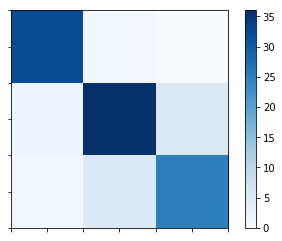

In [14]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=.6)

clfi = DecisionTreeClassifier()
clfi.fit(Xi_train, yi_train)

yi_pred = clfi.predict(Xi_test)
cmi = confusion_matrix(yi_test, yi_pred)

print(cmi)

fig, ax = plt.subplots()
plt.imshow(cmi, cmap="Blues")
plt.colorbar()
ax.tick_params(labelbottom='off', labelleft='off')
plt.show()

### Precision and Recall Metrics

* precision:  When a label is predicted, how often is it correct?
    * precision = tp / (tp + fp)
    
    
* recall: When a sample is actually a given label, how often is is predicted correct?  
    * recall =  tp / (tp + fn)

In [15]:
# Add code to calculate and print precision and recall for the iris dataset
# (note: use Sklearn libraries helper functions...)

precision, recall, f1, support = precision_recall_fscore_support(yi_test, yi_pred)

In [16]:
[print(p)for p in precision];

0.914285714286
0.857142857143
0.833333333333


In [17]:
[print(r) for r in recall];

0.969696969697
0.837209302326
0.806451612903


In [18]:
[print(f)for f in f1];

0.941176470588
0.847058823529
0.819672131148
